- Let us see how a decision boundary is derived from the arguments above.
- As we have seen earlier the boundary is obtained by solving $P(\pi_1 | x) = P(\pi_2 | x)$
- Let us take the case of some specific distributions of x to illustrate the idea.

- Let $x$ be d-dimensional random vectors coming from two normal distributions corresponding to the two classes.
- That is, $p_i(x) = N(\mu_i, \Sigma_i)$, $\mu_i, \Sigma_i$ being the means and covariance matrices of the respective classes.
- Therefore, $p_i(x) = \frac{1}{ {(2*\pi)}^{d/2} |\Sigma|^{1/2}}e^{-\frac{(x-\mu_i)^T \Sigma_i^{-1} (x-\mu_i)}{2}}$


- Now $P(\pi_1|x) = P(\pi_2|x)$ translates to the following equation by taking log on both sides.
- $-\frac{(x-\mu_1)^T \Sigma_1^{-1} (x-\mu_1)}{2} + \ln(q_1) - \frac{d}{2}{\ln(2\pi)} - \frac{1}{2} \ln(|\Sigma_1|) =  -\frac{(x-\mu_2)^T \Sigma_2^{-1} (x-\mu_2)}{2} + \ln(q_2) - \frac{d}{2}{\ln(2\pi)} - \frac{1}{2} \ln(|\Sigma_2|)$

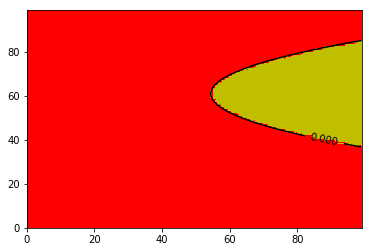

In [16]:
import numpy as np 
import matplotlib.pyplot as plt

def g(x,p,mu,sigma):
    n = x.shape[1]
    mu = np.squeeze(mu)
    mu = mu[:,np.newaxis]
    sigma_inv = np.linalg.inv(sigma)
    g = []
    for i in range(n):
        x_i = x[:,i]
        x_i = x_i[:,np.newaxis]
        t_i = np.dot((x_i - mu).T, sigma_inv)
        t_i = -0.5*np.dot(t_i, x_i - mu)
        g_i = t_i + np.log(p) - 0.5*np.log(np.linalg.det(sigma))
        g.append(g_i)
    g = np.squeeze(np.array(g))
    return g

xrange = np.linspace(-10,10,100)
yrange = np.linspace(-10,10,100)
x,y = np.meshgrid(xrange, yrange)
X = np.zeros((2,np.prod(x.shape)))
X[0,:] = x.ravel()
X[1,:] = y.ravel()
p_1 = 0.5;p_2 = 0.5
mu_1 = np.array([1,1])[:,np.newaxis]
mu_2 = np.array([2,2])[:,np.newaxis]
sigma_1 = np.diag([0.5,2])
sigma_2 = 0.5*np.eye((2))
g_1 = g(X,p_1,mu_1,sigma_1) 
g_2 = g(X,p_2,mu_2,sigma_2) 
g_1 = g_1.reshape(*x.shape)
g_2 = g_2.reshape(*x.shape)             
g = g_1 - g_2
g_l = np.zeros_like(g)
g_l[g<0] = -1.0
g_l[g>0] = 1.0
contour = plt.contour(g ,levels = [0], colors=['k'])
plt.clabel(contour)
plt.contourf(g_l,colors=['y','r'])
plt.show()
        
        

##### Some special cases

- **Same covariance matrix for all the classes**
- The quadratic term vanishes as the expansion of the first term is $ -\frac{x^T \Sigma_i^{-1} x - 2\mu_i^T \Sigma_i^{-1} x + \mu_i^T \mu_i }{2} $
- This leads to a linear decision boundary between the two classes.
- *** Find the linear decision boundary equation for a two dimensional case.***


-**$\Sigma_i = \sigma^2 I $ ** for both classes
- And the classes are equiprobable.

### Incorporating cost of misclassification

- Assume putting a class $\pi_1$ data into $\pi_2$ incurs a cost given by $C_{21}$
- Simiarly $C_{12}$ is the cost of putting class $\pi_2$ data into $\pi_1$. 
- Eg. It very coslty to misclassify a patient with some abnormality as a healthy normal. This scenario is represented by giving a high value for $C_{21}$. The other misclassification is not as costly as the first one. Therefore we can give $C_{1}$ a lower value.

#### What is the classification objective?

- Expected cost of misclassification ( denote it by C)
- $ C = C_{12} P(E_{12}) + C_{21} P(E_{21}) $
- Finding the regions $R_1$ and $R_2$ follows the same procedure as in the case of minimizing the probability of error.
- Prove that the decision boundary equation is obtained by solving $C_{21} p_1(x)q_1 = C_{12} p_2(x)q_2 $
